<a href="https://colab.research.google.com/github/SprIoan/NNColab/blob/main/Ergasia_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title  Intro Code

%%html
<html xmlns="http://www.w3.org/1999/xhtml">

<head>
	<meta http-equiv='Content-Type' content='text/html; charset=UTF-8' />
	
	<title>3D Text Tower</title>
	
	<style type="text/css">
	
		* { margin: 0; padding: 0; }
		body { background: #666; }
		h1,h2,h3,h4 { margin: 0 0 3px 0; }
	   h1 { color: white; font: bold 52px Helvetica, Arial, Sans-Serif;
		       text-shadow: 1px 1px #0F2520, 2px 2px #0F2520, 3px 3px #0F2520;
		       -webkit-transition: all 0.12s ease-out;
		       -moz-transition: all 0.12s ease-out;
		       -o-transition: all 0.12s ease-out;
		}
		h1:hover {
		    position: relative; top: -3px; left: -3px; 
		    text-shadow: 1px 1px #0F2520, 2px 2px #0F2520, 3px 3px #0F2520, 4px 4px #0F2520, 5px 5px #0F2520, 6px 6px #0F2520;
		}

		#page-wrap { width: 700px; margin: 0 auto; padding: 20px; text-align: center; }
		.about {  color: white; font: bold 30px Helvetica, Arial, Sans-Serif;
		       text-shadow: 1px 1px #0F2520, 1px 1px #0F2520, 1px 1px #0F2520;
		       -webkit-transition: all 0.12s ease-out;
		       -moz-transition: all 0.12s ease-out;
		       -o-transition: all 0.12s ease-out
           margin: 20px;
    }

    .about:hover {

       position: relative; top: -3px; left: -3px; 
		    text-shadow: 1px 1px #0F2520, 2px 2px #0F2520, 3px 3px #0F2520, 4px 4px #0F2520, 5px 5px #0F2520, 6px 6px #0F2520;

    }
	</style>
</head>

<body>

	<div id="page-wrap">

		<h1>Ομάδα 38</h1>

		<div id="about">
      <div></div>
		  <ul>
        <br>
        <div class="about">Χαδουμέλλης Ανδρέας (03116641)</div>
        <br>
		    <div class="about">Γρηγοράτος Σπυρίδων (03116161)</div>
        <br>
		    <div class="about">Ιωάννου Σπυρίδων (03116110)</div>
      </ul>
			
	</div>
	
  </div>
</body>

</html>

In [ ]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #--upgrade #upgrade pandas package

     |████████████████████████████████| 1.5MB 6.7MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 6.8 MB 6.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 14.5 MB 78 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.4)


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_recall_fscore_support
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Μικρό Dataset: S10 - [Statlog (Veichle Silhouettes)](http://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29)**


##Βασικές Πληροφορίες

1. Με μία σύντομη επισκόπηση βλέπουμε πως το dataset μας αποτελείται από δεδομένα που αφορούν οχήματα διαφορετικών ειδών. Συγκεκριμένα, υπάρχουν 4 κατηγορίες στις οποίες ανήκουν τα αντικείμενα: bus, opel, saab, van. Τα χαρακτηριστικά του κάθε αντικειμένου είναι διάφορα χαρακτηριστικά τα οποία έχουν εξαχθεί από εικόνες που αντιστοιχούν σε οχήματα των παραπάνω κατηγοριών. Τα δεδομένα του dataset βρίσκονται στο αρχείο "all_data.data".

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Neural Networks/Ασκησεις/1η Εργασία/'
small_data_path = path+'small_all_data.data'
df = pd.read_csv(small_data_path, sep=' ', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab


2. Έχουμε 846 δείγματα. Κάθε δείγμα έχει 18 χαρακτηριστικά, τα οποία όπως αναφέραμε είναι διάφορα χαρακτηριστικά που εξήχθησαν από τις εικόνες οχημάτων που ανήκουν σε αυτές τις κατηγορίες. Όλα τα χαρακτηριστικά είναι αριθμητικά. Πρόκειται για διάφορες μετρικές (πχ. κυκλικότητα, ορθογωνιότητα, διάφοροι λόγοι, διασπορές κτλ.) συνεπώς θεωρούμε πως είναι όλα διατεταγμένα. 

3. Στα αρχεία του dataset δεν υπήρχε κάποια αρίθμηση ή κεφαλίδα, μόνο τα δεδομένα.

4. Οι ετικέτες των κλάσεων είναι οι 4 που αναφέρθηκαν παραπάνω (bus, opel, saab, van) και βρίσκονται στην τελευταία κολόνα. 

5. Δε χρειάστηκε κάποια μετατροπή στα text αρχεία, μόνο η συνένωσή τους σε ένα, η οποία έγινε χειροκίνητα.

6. Όσον αφορά τις τιμές των χαρακτηριστικών δεν υπήρχαν απουσιάζουσες τιμές (lucky us) 

In [ ]:
labels_df = df.iloc[:,[-1]] #Τα labels βρισκονται στην τελευταία στήλη
features_df = df.iloc[:,:18] #18 attributes, στις στήλες 0-17.

np_features=features_df.values #Μετατρέπουμε το dataframe σε np array
print(np_features.shape)

(846, 18)


Όπως βλέπουμε στο output του παρακάτω κελιού κώδικα, τα αντικείμενα μας ανήκουν στις κατηγορίες bus, opel, saab, van.
Θα χρησιμοποιήσουμε το εξής mapping:

0:bus 

1:opel

2:saab

3:van


In [ ]:
unique_labels = np.unique(labels_df.values) #Παίρνουμε τη λίστα με τα ονόματα των κλάσεων των αντικειμένων μας.
print(unique_labels)
mapping = {'bus' : 0, 'opel' : 1, 'saab' : 2, 'van' : 3}
np_labels =  labels_df.replace(mapping).values.flatten()
print(np_labels)
print(np_labels.shape)

['bus' 'opel' 'saab' 'van']
[3 3 2 3 0 0 0 3 3 2 3 2 0 3 0 1 3 0 2 1 0 3 0 0 2 3 2 2 0 2 3 2 1 1 1 3 0
 3 2 0 1 3 3 2 2 3 3 0 3 2 2 2 1 0 0 3 2 3 1 3 1 1 3 0 0 1 0 1 3 0 1 1 1 1
 3 1 2 2 0 0 0 0 3 1 0 0 3 3 0 1 2 1 2 3 0 1 2 0 1 0 0 3 3 3 0 2 1 1 0 0 3
 3 1 1 3 3 1 2 0 0 2 3 3 2 3 3 0 0 3 0 2 2 2 3 1 3 3 3 2 3 2 0 1 0 1 1 3 0
 2 3 2 0 1 2 3 0 1 3 2 1 1 1 2 2 1 1 2 2 0 3 1 0 3 0 3 0 1 0 0 3 2 1 0 2 2
 0 0 1 1 1 1 3 2 0 2 0 2 0 0 0 3 2 1 1 3 3 1 0 0 1 1 3 0 0 1 1 2 1 0 3 1 3
 0 0 2 3 2 3 2 2 3 2 0 2 3 3 0 0 1 0 1 1 0 2 3 3 0 2 1 2 3 1 3 0 3 2 2 1 2
 1 2 2 3 3 2 0 0 2 3 3 0 2 3 3 0 0 0 1 2 0 1 0 0 2 3 2 0 3 1 2 3 3 0 3 0 0
 0 2 2 0 2 1 0 3 0 0 2 1 1 1 2 3 0 1 0 3 3 2 3 0 2 0 0 2 2 0 1 1 3 2 3 1 1
 0 0 2 3 0 3 0 0 1 2 1 1 0 2 1 3 1 1 2 3 0 2 1 0 2 1 1 2 2 2 3 1 2 3 2 0 1
 0 0 3 0 3 0 2 2 2 1 1 0 0 1 1 3 2 3 3 1 0 3 3 0 2 1 0 0 0 3 2 1 1 3 1 0 1
 2 0 2 2 1 0 1 3 1 0 0 0 2 3 1 2 0 1 1 1 1 2 3 2 0 2 0 2 3 3 1 1 2 2 3 3 1
 0 3 2 1 0 3 0 1 1 0 2 0 3 3 1 2 3 1 1 1 0 0 0 1 2 3 3 1 0 1 1 2 1 3 0 0

7. Βλεπουμε πως κάθε κλάση έχει τα παρακάτω στιγμιότυπα επί του συνόλου:

  bus: 218

  opel: 212

  saab: 217

  van: 199

  Το dataset μας είναι ισορροπημένο, αφού instances_max/instances_min = 218/199=1.095 < 1.5

In [ ]:
from collections import Counter
instances_per_class = Counter(np_labels)
print(instances_per_class)

Counter({0: 218, 2: 217, 1: 212, 3: 199})


8. Χωρίζουμε το dataset σε train και test set. Δεν υπάρχουν απουσιάζουσες τιμές ή μη διατεταγμένεα χαρακτηριστικά, συνεπώς προχωράμε κατευθείαν στο διαχωρισμό (20% για test set).

In [ ]:
from sklearn.model_selection import train_test_split

# Split our data
train_data, test_data, train_labels, test_labels = train_test_split(np_features, np_labels, test_size=0.2)
instances_per_class = Counter(train_labels)
print(instances_per_class)

Counter({2: 176, 0: 172, 1: 168, 3: 160})


##Ταξινόμηση
Οι ταξινομητές που εξετάζουμε σε αυτό το dataset είναι οι: dummy, Gaussian Naive Bayes, kNN.

###Baseline Classification

In [ ]:
#Xρησιμοποιούμε την παρακάτω συνάρτηση για να απεικονίσουμε χρωματικά το confusion matrix 
def view_conf_matrix(cnf_matrix, labels, cmap='gray'):
  fix, ax = plt.subplots(figsize=(6,6))
  ax.set_xticks(range(0,len(cnf_matrix)))
  ax.set_yticks(range(0,len(cnf_matrix)))
  ax.set_xticklabels(labels, size=11)
  ax.set_yticklabels(labels, size=11)
  ax.xaxis.tick_top()
  for i in range(len(labels)):
    for j in range(len(labels)):
      text = ax.text(j,i,cnf_matrix[i,j],ha='center',va='center',color='black')
  ax.imshow(cnf_matrix,cmap=cmap)

####Dummy Classifiers
Θα χρησιμοποιήσυμε όλες τις γνωστές στρατηγικές επιλογής για τους dummy classifiers εκτός από την constant

Dummy Uniform Classifier

Confusion Matrix for Dummy Uniform Classifier:
 [[11 15  7 13]
 [12 14  8 10]
 [10 11 13  7]
 [ 5 14  7 13]]


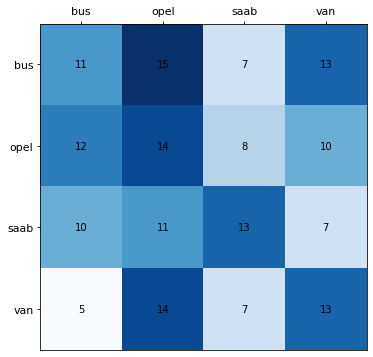

In [ ]:
dummy_uniform = DummyClassifier(strategy='uniform')

dummy_uniform_model = dummy_uniform.fit(train_data, train_labels)
dummy_uniform_preds = dummy_uniform.predict(test_data)

cnf_matrix = confusion_matrix(test_labels, dummy_uniform_preds)
print("Confusion Matrix for Dummy Uniform Classifier:\n",cnf_matrix)

view_conf_matrix(cnf_matrix, unique_labels, cmap='Blues')

In [ ]:
f1_micro_du = precision_recall_fscore_support(test_labels, dummy_uniform_preds, average='micro')[2]
f1_macro_du = precision_recall_fscore_support(test_labels, dummy_uniform_preds, average='macro')[2]

print("Dummy Uniform Classifier:\t f1_micro:"+str(f1_micro_du)[:5]+"\t f1_macro:"+str(f1_macro_du)[:5]+'\n')

print(classification_report(test_labels, dummy_uniform_preds , target_names=unique_labels))

Dummy Uniform Classifier:	 f1_micro:0.3	 f1_macro:0.301

              precision    recall  f1-score   support

         bus       0.29      0.24      0.26        46
        opel       0.26      0.32      0.29        44
        saab       0.37      0.32      0.34        41
         van       0.30      0.33      0.32        39

    accuracy                           0.30       170
   macro avg       0.31      0.30      0.30       170
weighted avg       0.30      0.30      0.30       170



Dummy Most Frequent Classifier

Confusion Matrix for Dummy Most Frequent Classifier:
 [[ 0  0 46  0]
 [ 0  0 44  0]
 [ 0  0 41  0]
 [ 0  0 39  0]]


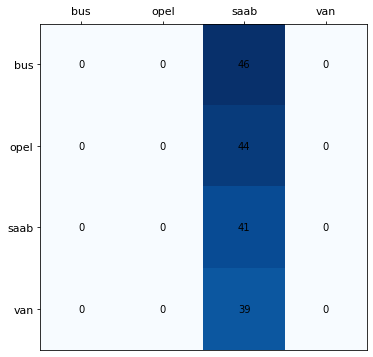

In [ ]:
dummy_mostFrequent = DummyClassifier(strategy='most_frequent')

dummy_mostFrequent_model = dummy_mostFrequent.fit(train_data, train_labels)
dummy_mostFrequent_preds = dummy_mostFrequent.predict(test_data)

cnf_matrix = confusion_matrix(test_labels, dummy_mostFrequent_preds)
print("Confusion Matrix for Dummy Most Frequent Classifier:\n",cnf_matrix)

view_conf_matrix(cnf_matrix, unique_labels, cmap='Blues')

In [ ]:
f1_micro_dmf = precision_recall_fscore_support(test_labels, dummy_mostFrequent_preds, average='micro')[2]
f1_macro_dmf = precision_recall_fscore_support(test_labels, dummy_mostFrequent_preds, average='macro')[2]

print("Dummy Most Frequent Classifier:\t f1_micro:"+str(f1_micro_dmf)[:5]+"\t f1_macro:"+str(f1_macro_dmf)[:5]+'\n')

print(classification_report(test_labels, dummy_mostFrequent_preds , target_names=unique_labels))

Dummy Most Frequent Classifier:	 f1_micro:0.241	 f1_macro:0.097

              precision    recall  f1-score   support

         bus       0.00      0.00      0.00        46
        opel       0.00      0.00      0.00        44
        saab       0.24      1.00      0.39        41
         van       0.00      0.00      0.00        39

    accuracy                           0.24       170
   macro avg       0.06      0.25      0.10       170
weighted avg       0.06      0.24      0.09       170



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dummy Stratified

Confusion Matrix for Dummy Stratified Classifier:
 [[ 8 14  9 15]
 [ 9 17  9  9]
 [13 12 10  6]
 [12 14  7  6]]


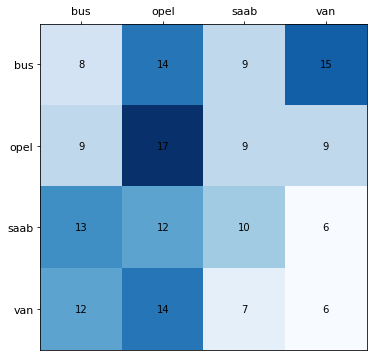

In [ ]:
dummy_stratified = DummyClassifier(strategy='stratified')

dummy_stratified_model = dummy_stratified.fit(train_data, train_labels)
dummy_stratified_preds = dummy_stratified.predict(test_data)

cnf_matrix = confusion_matrix(test_labels, dummy_stratified_preds)
print("Confusion Matrix for Dummy Stratified Classifier:\n",cnf_matrix)

view_conf_matrix(cnf_matrix, unique_labels, cmap='Blues')

In [ ]:
f1_micro_ds = precision_recall_fscore_support(test_labels, dummy_stratified_preds, average='micro')[2]
f1_macro_ds = precision_recall_fscore_support(test_labels, dummy_stratified_preds, average='macro')[2]

print("Dummy Most Frequent Classifier:\t f1_micro:"+str(f1_micro_ds)[:5]+"\t f1_macro:"+str(f1_macro_ds)[:5]+'\n')

print(classification_report(test_labels, dummy_stratified_preds , target_names=unique_labels))

Dummy Most Frequent Classifier:	 f1_micro:0.241	 f1_macro:0.235

              precision    recall  f1-score   support

         bus       0.19      0.17      0.18        46
        opel       0.30      0.39      0.34        44
        saab       0.29      0.24      0.26        41
         van       0.17      0.15      0.16        39

    accuracy                           0.24       170
   macro avg       0.24      0.24      0.24       170
weighted avg       0.24      0.24      0.24       170



Γενικα βλεπουμε πως οι dummy classifiers έχουν πολύ χαμηλά ποσοστά επιτυχίας και γενικα δεν εχουν και πολυ νοημα, παρα μονο στο να καταλαβουμε ποσο γτπ ειναι


#### Gaussian Naive Bayes Classifier

Gaussian Naive Bayes Classifier:
 [[ 7  7  1 31]
 [ 1 20  9 14]
 [ 0 14 13 14]
 [ 0  0  2 37]]


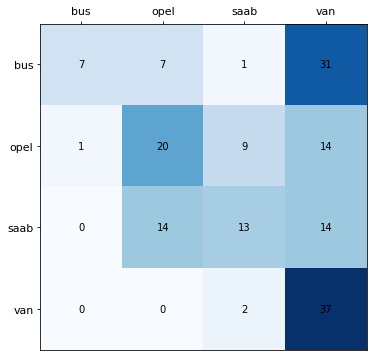

In [ ]:
gnb = GaussianNB()

gnb_model = gnb.fit(train_data, train_labels)
gnb_preds = gnb.predict(test_data)

cnf_matrix_gnb = confusion_matrix(test_labels, gnb_preds)
print("Gaussian Naive Bayes Classifier:\n",cnf_matrix_gnb)

view_conf_matrix(cnf_matrix_gnb, unique_labels, cmap='Blues')

In [ ]:
f1_micro_gnb = precision_recall_fscore_support(test_labels, gnb_preds, average='micro')[2]
f1_macro_gnb = precision_recall_fscore_support(test_labels, gnb_preds, average='macro')[2]

print("Gaussian Naive Bayes Classifier:\t f1_micro:"+str(f1_micro_gnb)[:5]+"\t f1_macro:"+str(f1_macro_gnb)[:5]+'\n')

print(classification_report(test_labels, gnb_preds , target_names=unique_labels))

Gaussian Naive Bayes Classifier:	 f1_micro:0.452	 f1_macro:0.417

              precision    recall  f1-score   support

         bus       0.88      0.15      0.26        46
        opel       0.49      0.45      0.47        44
        saab       0.52      0.32      0.39        41
         van       0.39      0.95      0.55        39

    accuracy                           0.45       170
   macro avg       0.57      0.47      0.42       170
weighted avg       0.58      0.45      0.41       170



#### kNN Classifier

kNN Classifier (k=5):
 [[38  4  3  1]
 [ 3 22 13  6]
 [ 5 18 15  3]
 [ 3  0  1 35]]


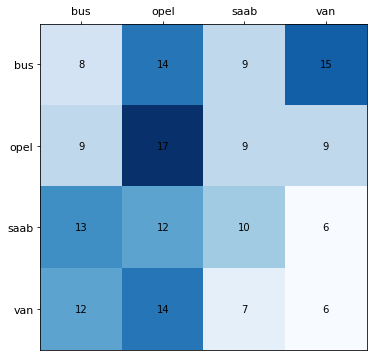

In [ ]:
knn = KNeighborsClassifier()  #Η default τιμη του k είναι 5. Θα βελτιστοποιηθεί σε επόμενο βήμα
knn_model = knn.fit(train_data, train_labels)
knn_preds = knn.predict(test_data)

cnf_matrix_knn = confusion_matrix(test_labels, knn_preds)
print("kNN Classifier (k=5):\n",cnf_matrix_knn)

view_conf_matrix(cnf_matrix, unique_labels, cmap='Blues')

In [ ]:
f1_micro_knn = precision_recall_fscore_support(test_labels, knn_preds, average='micro')[2]
f1_macro_knn = precision_recall_fscore_support(test_labels, knn_preds, average='macro')[2]

print("kΝΝ Classifier:\t f1_micro:"+str(f1_micro_knn)[:5]+"\t f1_macro:"+str(f1_macro_knn)[:5]+'\n')

print(classification_report(test_labels, knn_preds , target_names=unique_labels))

kΝΝ Classifier:	 f1_micro:0.647	 f1_macro:0.636

              precision    recall  f1-score   support

         bus       0.78      0.83      0.80        46
        opel       0.50      0.50      0.50        44
        saab       0.47      0.37      0.41        41
         van       0.78      0.90      0.83        39

    accuracy                           0.65       170
   macro avg       0.63      0.65      0.64       170
weighted avg       0.63      0.65      0.64       170



#### Σύγκριση και σχολιασμός Αποτελεσμάτων

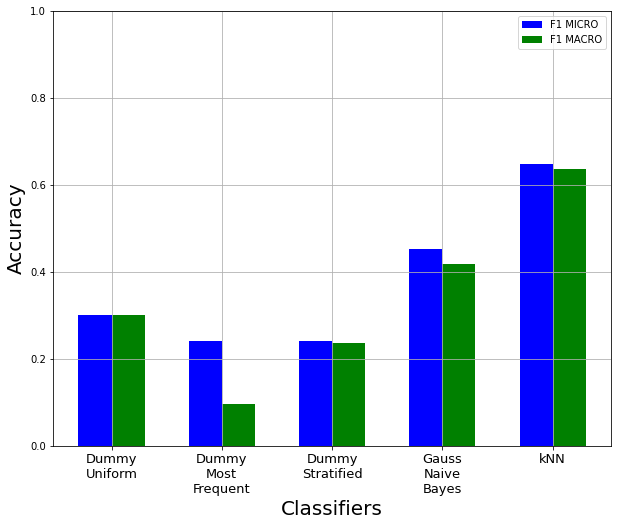

In [ ]:
classifiers=["Dummy\nUniform","Dummy\nMost\nFrequent","Dummy\nStratified","Gauss\nNaive\nBayes","kNN"]

f1_micros_def=[f1_micro_du, f1_micro_dmf, f1_micro_ds, f1_micro_gnb, f1_micro_knn]
f1_macros_def=[f1_macro_du, f1_macro_dmf, f1_macro_ds, f1_macro_gnb, f1_macro_knn]

fig, ax = plt.subplots(figsize = (10,8))
ax.grid(True)
xax=np.arange(len(classifiers))
ax.set_xticks(xax)
ax.set_xticklabels(classifiers, size=13)
ax.set_xlabel('Classifiers', size=20)
ax.set_ylim(0,1)
ax.set_ylabel("Accuracy", size=20)

ax.bar(xax-0.3,f1_micros_def, label='F1 MICRO',align='edge',width=0.3, color='blue' )
ax.bar(xax, f1_macros_def, label='F1 MACRO',align='edge',width=0.3, color='green' )
plt.legend()


Όπως εύκολα παρατηρούμε, ο kNN έχει πολύ καλύτερες επιδόσεις από όλους τους ταξινομητές.

### Βελτιστοποίηση Ταξινομητών

#### Βελτιστοποίηση Dummy Classifiers

Just kidding, δε μπορεί να γίνει κάποια βελτιστοποίηση και δε θα αναλωθουμε προσπαθωντας να βελτιώσουμε τους dummies. Το όνομά τους δεν το πήραν τυχαια :)

In [ ]:
f1_micros_opt=[f1_micro_du, f1_micro_dmf, f1_micro_ds]
f1_macros_opt=[f1_macro_du, f1_macro_dmf, f1_macro_ds]

#### Βελτιστοποίηση Gaussian Naive Bayes Classifier  
Ο GNB Classifier δεν έχει κάποια υπερπαράμετρο προς βελτιστοποίηση, οπότε προσπαθούμε να πάρουμε καλύτερα αποτελέσματα αποκλειστικά μέσω του preprocessing

#####**ΔΟΚΙΜΗ 1: Μείωση της διαστατικότητας των δεδομένων με επιλογή χαρακτηριστικών έπειτα απο min-max κανονικοποίηση:**  
Η πρώτη δοκιμή που κάναμε ήταν να εφαρμόσουμε κανονικοποίηση min-max στα δεδομένα και στη συνέχεια να κάνουμε επιλογή χαρακτηριστικών χρησιμοποιώντασ Variance Threshold. Η υψηλότερη απόδοση που καταφέραμε να πάρουμε ήταν της τάξης του 52%, συνεπώς δεν υπήρξε κάποια βελτίωση.






Threshold=0. Keeping 18 attributes.
Threshold=0.01. Keeping 15 attributes.
Threshold=0.02. Keeping 15 attributes.
Threshold=0.03. Keeping 13 attributes.
Threshold=0.05. Keeping 4 attributes.
Threshold=0.06. Keeping 1 attributes.


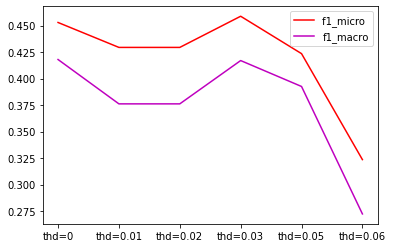

In [ ]:
#ΔΟΚΙΜΗ ΜΕΙΩΣΗΣ ΔΙΑΣΤΑΣΕΩΝ ΜΕ ΕΠΙΛΟΓΗ ΜΕΤΑΒΛΗΤΩΝ EΠΕΙΤΑ ΑΠΟ ΚΑΝΟΝΙΚΟΠΟΙΗΣΗ (Δεν πηγε και πολυ καλα αυτο)

min_max_scaler = preprocessing.MinMaxScaler()
train_data_norm = min_max_scaler.fit_transform(train_data)
test_data_norm = min_max_scaler.transform(test_data)

f1_micros=[]
f1_macros=[]
thds = [0,0.01,0.02,0.03,0.05,0.06]
for threshold in thds:
  selector = VarianceThreshold(threshold=threshold)
  train_data_reduced = selector.fit_transform(train_data_norm)
  mask = selector.get_support()
  print("Threshold="+str(threshold)+". Keeping "+str(list(mask).count(True))+" attributes.")
  train_data_reduced = train_data_norm[:,mask]
  test_data_reduced = test_data_norm[:,mask]
  gnb_model_opt = gnb.fit(train_data_reduced, train_labels)
  gnb_preds_opt = gnb.predict(test_data_reduced)
  f1_micros.append(precision_recall_fscore_support(test_labels, gnb_preds_opt, average='micro')[2])
  f1_macros.append(precision_recall_fscore_support(test_labels, gnb_preds_opt, average='macro')[2])


fig, ax = plt.subplots()
xax=range(len(thds))
ax.set_xticks(xax)
ax.set_xticklabels(["thd="+str(i) for i in thds])
ax.plot(xax, f1_micros, label='f1_micro ', color='red')
ax.plot(xax, f1_macros, label='f1_macrο', color='m')
plt.legend()

#####**ΔΟΚΙΜΗ 2: Μείωση της διαστατικότητας των δεδομένων με την τεχνική PCA**  
Eδώ αυτό που καταφέραμε είναι αρκετά παράξενο. Ενώ η τεχνική PCA αποσκοπεί στη μείωση της διαστατικότητας, εν τέλει, τα καλύτερα αποτελέσματα τα πήραμε όταν εφαρμόσαμε μετασχηματισμό που οδηγούσε σε ίδιο αριθμό διαστάσεων με τον αρχικό. Αυτό που ενδεχομένως έγινε, είναι ότι η μέθοδος παρήγαγε διαφορετικά 18 χαρακτηριστικά από τα αρχικά 18 που είχαν τα δείγματα. Η βελτίωση είναι σημαντική, καθώς από accuracy της ταξης του 50%, πήγαμε σε τάξη του 70%.

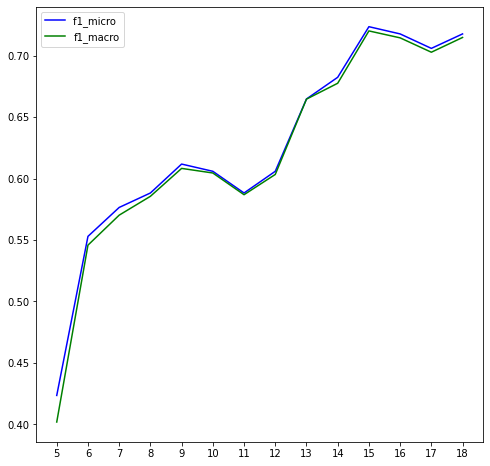

In [ ]:
#ΔΟΚΙΜΗ ΜΕΙΩΣΗΣ ΔΙΑΣΤΑΣΕΩΝ ΜΕ ΕΞΑΓΩΓΗ ΧΑΡΑΚΤΗΡΙΣΤΙΚΩΝ
f1_micros=[]
f1_macros=[]
nus = list(range(5,19))

for n in nus:
  pca = PCA(n_components=n)
  train_data_reduced = pca.fit_transform(train_data)
  test_data_reduced = pca.transform(test_data)
  gnb_model_opt = gnb.fit(train_data_reduced, train_labels)
  gnb_preds_opt = gnb.predict(test_data_reduced)
  f1_micros.append(precision_recall_fscore_support(test_labels, gnb_preds_opt, average='micro')[2])
  f1_macros.append(precision_recall_fscore_support(test_labels, gnb_preds_opt, average='macro')[2])

fig, ax = plt.subplots(figsize=(8,8))
xax=range(len(nus))
ax.set_xticks(xax)
ax.set_xticklabels(nus)
ax.plot(xax, f1_micros, label='f1_micro ', color='b')
ax.plot(xax, f1_macros, label='f1_macro', color='g')
plt.legend()

In [ ]:
f1_micros_opt.append(f1_micros[-4])
f1_macros_opt.append(f1_macros[-4])

#### kNN Classifier
Εδώ, εκτός από τους διάφορους μετασχηματισμούς κατά την προεπεξεργασία των δεδομένων, θα βελτιστοποιήσουμε και την παράμετρο k του kNN χρησιμοποιώντας 10-fold cross validation. **NA TΡΕΧΤΕΙ 1 ΦΟΡΑ ΠΡΙΝ ΤΗΝ ΥΠΟΒΟΛΗ ΚΑΙ ΝΑ ΓΙΝΟΥΝ EDIT ΤΑ ΣΧΟΛΙΑ**

#####**ΔΟΚΙΜΗ 1: Εφαρμογή κανονικοποίησης min-max και στη συνεχεια επιλογή χαρακτηριστικών με VarianceThreshold:**  
Κανονικοποιούμε το dataset με τη μέθοδο min-max και στη συνέχεια δοκιμάζουμε τους εξής συνδυασμούς:  
- $k \in(1,20)$ 
- $thd \in (0,0.06)$ με βήμα $0.01$

Πρώτα κάναμε τη διαδικασία χειροκίνητα και παρουσιάζουμε γραφικά τα αποτελέσματα και στη συνέχεια επαναλαμβάνουμε τη διαδικασία κάνοντας pipeline και CVGridSearch.

In [ ]:
#ΔΟΚΙΜΗ ΜΕΙΩΣΗΣ ΔΙΑΣΤΑΣΕΩΝ ΜΕ ΕΠΙΛΟΓΗ ΜΕΤΑΒΛΗΤΩΝ EΠΕΙΤΑ ΑΠΟ ΚΑΝΟΝΙΚΟΠΟΙΗΣΗ

#Aρχικά κάνουμε τη διαδικασία χειροκίνητα
min_max_scaler = preprocessing.MinMaxScaler()
train_data_norm = min_max_scaler.fit_transform(train_data)
test_data_norm = min_max_scaler.transform(test_data)

f1_micros=[]
f1_macros=[]

thds = [0,0.01,0.02,0.03,0.05,0.06]
ks = list(range(1,21)) #Θα μπορούσαμε να πάρουμε μόνο τα περιττά k, αλλά έχουμε 4 κλάσεις, όχι 2 οπότε οι ισοπαλίες δε θα είναι συχνές.

for threshold in thds:
  selector = VarianceThreshold(threshold=threshold)
  train_data_reduced = selector.fit_transform(train_data_norm)
  mask = selector.get_support()
  print("Threshold="+str(threshold)+". Keeping "+str(list(mask).count(True))+" attributes.")
  train_data_reduced = train_data_norm[:,mask]
  test_data_reduced = test_data_norm[:,mask]

  thd_f1_micros=[]
  thd_f1_macros=[]

  for k in ks:
    knn_opt = KNeighborsClassifier(n_neighbors=k)
    f1_micro = cross_val_score(knn_opt, train_data_reduced, train_labels, cv=10, scoring='f1_micro')[2]
    f1_macro = cross_val_score(knn_opt, train_data_reduced, train_labels, cv=10, scoring='f1_macro')[2]
    print("\t k="+str(k)+". f1_micro="+str(f1_micro)[:6]+" f1_macro="+str(f1_macro)[:6])
    thd_f1_micros.append(f1_micro)
    thd_f1_macros.append(f1_macro)
  
  f1_micros.append(thd_f1_micros)
  f1_macros.append(thd_f1_macros)

Threshold=0. Keeping 18 attributes.
	 k=1. f1_micro=0.7794 f1_macro=0.7708
	 k=2. f1_micro=0.6764 f1_macro=0.6742
	 k=3. f1_micro=0.7205 f1_macro=0.7125
	 k=4. f1_micro=0.7058 f1_macro=0.7038
	 k=5. f1_micro=0.6911 f1_macro=0.6834
	 k=6. f1_micro=0.6470 f1_macro=0.6314
	 k=7. f1_micro=0.6470 f1_macro=0.6388
	 k=8. f1_micro=0.6764 f1_macro=0.6687
	 k=9. f1_micro=0.6470 f1_macro=0.6360
	 k=10. f1_micro=0.6911 f1_macro=0.6761
	 k=11. f1_micro=0.7352 f1_macro=0.7179
	 k=12. f1_micro=0.6911 f1_macro=0.6785
	 k=13. f1_micro=0.6764 f1_macro=0.6528
	 k=14. f1_micro=0.6764 f1_macro=0.6567
	 k=15. f1_micro=0.7205 f1_macro=0.7027
	 k=16. f1_micro=0.7205 f1_macro=0.7017
	 k=17. f1_micro=0.7058 f1_macro=0.6835
	 k=18. f1_micro=0.7205 f1_macro=0.7017
	 k=19. f1_micro=0.7205 f1_macro=0.6999
	 k=20. f1_micro=0.7058 f1_macro=0.6814
Threshold=0.01. Keeping 15 attributes.
	 k=1. f1_micro=0.75 f1_macro=0.7423
	 k=2. f1_micro=0.6617 f1_macro=0.6577
	 k=3. f1_micro=0.75 f1_macro=0.7441
	 k=4. f1_micro=0.720

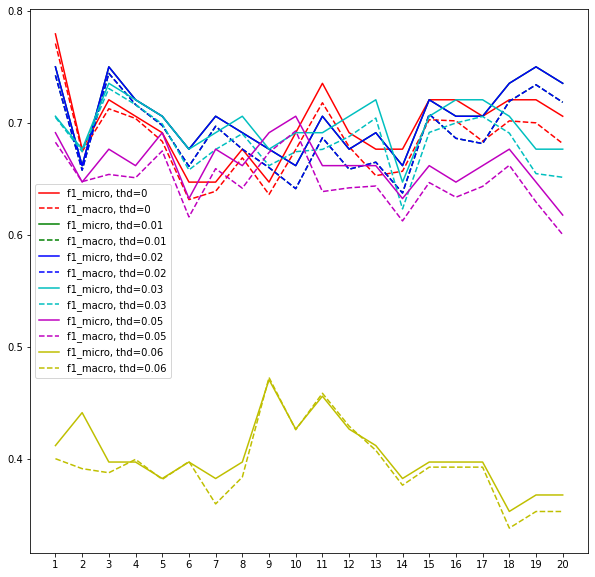

In [ ]:
colors=['r','g','b','c','m','y']
fig, ax = plt.subplots(figsize=(10,10))
xax=ks
ax.set_xticks(xax)
#ax.set_ylim(0,1)
ax.set_xticklabels(xax)
for i in range(len(f1_micros)):
  ax.plot(xax, f1_micros[i],colors[i], label='f1_micro, thd='+str(thds[i]))
  ax.plot(xax, f1_macros[i],colors[i]+"--", label='f1_macro, thd='+str(thds[i]))
plt.legend()

In [ ]:
#Στη συνέχεια κάνουμε την ίδια διαδικασία μέσω της χρήσης pipeline+GridSearchCV
#Xρησιμοποιούμε 2 ίδιους estimators με μοναδική διαφορά τη μετρκή απόδοσης.
selector=VarianceThreshold()
min_max_scaler = preprocessing.MinMaxScaler()
knn = KNeighborsClassifier()
pipe = Pipeline(steps=[('scaler', min_max_scaler),('selector', selector), ('kNN', knn)])
estimator1 = GridSearchCV(pipe, dict(selector__threshold=thds, kNN__n_neighbors=ks), cv=10, scoring='f1_micro', n_jobs=-1)
estimator2 = GridSearchCV(pipe, dict(selector__threshold=thds, kNN__n_neighbors=ks), cv=10, scoring='f1_micro', n_jobs=-1)
estimator1.fit(train_data, train_labels)
estimator2.fit(train_data, train_labels)
preds1 = estimator1.predict(test_data)
preds2 = estimator2.predict(test_data)

In [ ]:
print(estimator1.best_estimator_)
print(estimator1.best_params_)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('selector', VarianceThreshold(threshold=0)),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=7, p=2,
                                      weights='uniform'))],
         verbose=False)
{'kNN__n_neighbors': 7, 'selector__threshold': 0}


In [ ]:
print(estimator2.best_estimator_)
print(estimator2.best_params_)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('selector', VarianceThreshold(threshold=0)),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=7, p=2,
                                      weights='uniform'))],
         verbose=False)
{'kNN__n_neighbors': 7, 'selector__threshold': 0}


Βλέπουμε πως το GridSearchCV προτείνει τις τιμές k=3, thd=0. Οι τιμές αυτές όπως μπορούμε να δούμε από το παραπάνω διάγραμμα δεν είναι οι βέλτιστες, αλλά είναι κοντά στις βέλτιστες. Θα ορίσουμε και έναν τρίτο estimator με τις βέλτιστες τιμές που προκύπτουν από το διάγραμμα, δηλαδή k=11, thd=0.01 και θα συγκρίνουμε τις αποδόσεις των 2 σσυνδυασμών στο test set.

In [ ]:
knn_opt_preds = estimator1.best_estimator_.predict(test_data)

f1_micro_knn_opt1=precision_recall_fscore_support(test_labels, knn_opt_preds, average='micro')[2]
f1_macro_knn_opt1=precision_recall_fscore_support(test_labels, knn_opt_preds, average='macro')[2]

print("Results of the optimal knn classifier as indicated by the CVGS:")
print("f1_micro:",f1_micro_knn_opt1 ,"f1_macro:",f1_macro_knn_opt1)

Results of the optimal knn classifier as indicated by the CVGS:
f1_micro: 0.6941176470588235 f1_macro: 0.6795216978143808


In [ ]:
estimator3 = GridSearchCV(pipe, dict(selector__threshold=[0.01], kNN__n_neighbors=[11]), cv=10, scoring='f1_micro', n_jobs=-1)
estimator3.fit(train_data, train_labels)
preds3 = estimator3.predict(test_data)
f1_micro_knn_opt3 = precision_recall_fscore_support(test_labels, preds3, average='micro')[2]
f1_micro_knn_opt3 = precision_recall_fscore_support(test_labels, preds3, average='macro')[2]

print("Results of the optimal knn classifier as indicated by the graph results:")
print("f1_micro:",f1_micro_knn_opt3 ,"f1_macro:",f1_micro_knn_opt3)

Results of the optimal knn classifier as indicated by the graph results:
f1_micro: 0.6283374033374034 f1_macro: 0.6283374033374034


Όπως βλέπουμε, το ζεύγος των υπερπαραμέτρων που πρότεινε το GSCV δεν είναι το βέλτιστο, αλλά είναι κοντά στο βέλτιστο. Δεν ισχυριζόμαστε πως το ζεύγος k=11, thd=0.01 είναι αναγκαία το βέλτιστο, αλλά φαίνεται πως είχε καλύτερα αποτελέσματα στο test set. Παρ όλα αυτά, σε κάθε περίπτωση η βελτίωση είναι ασήμαντη μιας και το αρχικό accuracy του kNN ήταν έτσι κι αλλιώς κοντά στο 60%

#####**ΔΟΚΙΜΗ 2: Μείωση της διαστατικότητας με τη μέθοδο PCA**
Εδώ δε θα κάνουμε κάποια κανονικοποίηση στις τιμές των δεδομένων και θα δούμε πώς επιδρά η PCA στην απόδοση του kNN. Δοκιμάζουμε τους εξής συνδυασμούς:    
- $k \in(1,20)$ 
- $n_{attributes} \in (4,18)$

In [ ]:
#Aρχικά κάνουμε τη διαδικασία χειροκίνητα

f1_micros=[]
f1_macros=[]

n = list(range(4,19,2))
ks = list(range(1,21)) #Θα μπορούσαμε να πάρουμε μόνο τα περιττά k, αλλά έχουμε 4 κλάσεις, όχι 2 οπότε οι ισοπαλίες δε θα είναι συχνές.

for nu in n:
  pca = PCA(n_components=nu)
  train_data_pca = pca.fit_transform(train_data)
  print("n="+str(nu)+". "+str(nu)+" attributes.")

  nu_f1_micros=[]
  nu_f1_macros=[]

  for k in ks:
    knn_opt = KNeighborsClassifier(n_neighbors=k)
    f1_micro = cross_val_score(knn_opt, train_data_pca, train_labels, cv=10, scoring='f1_micro')[2]
    f1_macro = cross_val_score(knn_opt, train_data_pca, train_labels, cv=10, scoring='f1_macro')[2]
    print("\t k="+str(k)+". f1_micro="+str(f1_micro)[:6]+" f1_macro="+str(f1_macro)[:6])
    nu_f1_micros.append(f1_micro)
    nu_f1_macros.append(f1_macro)
  
  f1_micros.append(nu_f1_micros)
  f1_macros.append(nu_f1_macros)

n=4. 4 attributes.
	 k=1. f1_micro=0.6470 f1_macro=0.6417
	 k=2. f1_micro=0.5294 f1_macro=0.5233
	 k=3. f1_micro=0.6176 f1_macro=0.6166
	 k=4. f1_micro=0.6029 f1_macro=0.5968
	 k=5. f1_micro=0.5735 f1_macro=0.5659
	 k=6. f1_micro=0.5735 f1_macro=0.5566
	 k=7. f1_micro=0.6323 f1_macro=0.6103
	 k=8. f1_micro=0.5882 f1_macro=0.5693
	 k=9. f1_micro=0.5294 f1_macro=0.5088
	 k=10. f1_micro=0.5294 f1_macro=0.5105
	 k=11. f1_micro=0.5441 f1_macro=0.5223
	 k=12. f1_micro=0.5588 f1_macro=0.5354
	 k=13. f1_micro=0.5441 f1_macro=0.5168
	 k=14. f1_micro=0.5294 f1_macro=0.4895
	 k=15. f1_micro=0.5294 f1_macro=0.4999
	 k=16. f1_micro=0.5294 f1_macro=0.4925
	 k=17. f1_micro=0.5147 f1_macro=0.4851
	 k=18. f1_micro=0.5147 f1_macro=0.4798
	 k=19. f1_micro=0.5735 f1_macro=0.5440
	 k=20. f1_micro=0.5735 f1_macro=0.5440
n=6. 6 attributes.
	 k=1. f1_micro=0.7058 f1_macro=0.7144
	 k=2. f1_micro=0.5735 f1_macro=0.5623
	 k=3. f1_micro=0.6617 f1_macro=0.6618
	 k=4. f1_micro=0.7058 f1_macro=0.7008
	 k=5. f1_micro

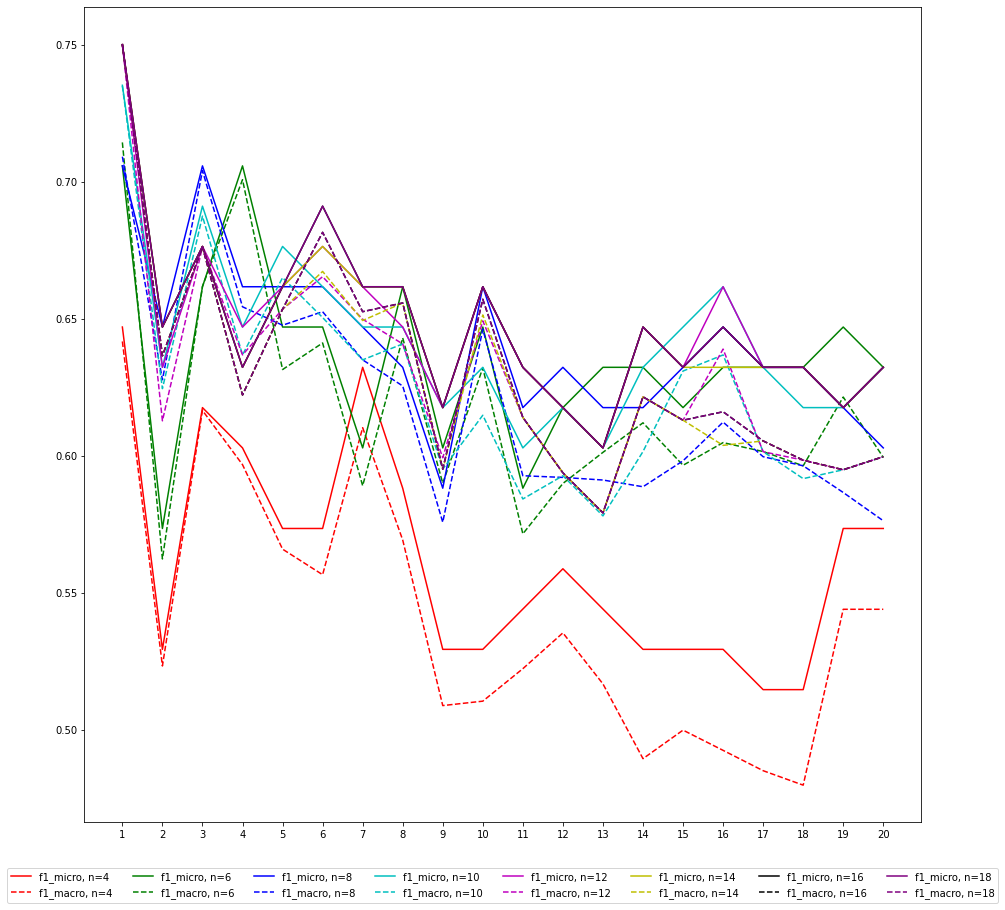

In [ ]:
from matplotlib.font_manager import FontProperties

colors=['r','g','b','c','m','y','black','purple']

fig, ax = plt.subplots(figsize=(15,15))
xax=ks
ax.set_xticks(xax)
#ax.set_ylim((0,1))

ax.set_xticklabels(xax)
for i in range(len(f1_micros)):
  ax.plot(xax, f1_micros[i],color=colors[i], label='f1_micro, n='+str(n[i]))
  ax.plot(xax, f1_macros[i],color=colors[i],linestyle="--", label='f1_macro, n='+str(n[i]))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True , ncol=8)

Παρατηρούμε πως: για n=16 και n=18 τα αποτελέσματα είναι τα ίδια. Την καλύτερη απόδοση την έχουμε για k=5 και n=16 ή 18

In [ ]:
k=list(range(1,21))
n_attrs=list(range(4,19))
knn = KNeighborsClassifier()
pca = PCA()
pipe = Pipeline(steps=[('selector', pca), ('kNN', knn)])

estimator1 = GridSearchCV(pipe, dict(selector__n_components=n_attrs, kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)
estimator2 = GridSearchCV(pipe, dict(selector__n_components=n_attrs, kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)
estimator1.fit(train_data, train_labels)
estimator2.fit(train_data, train_labels)
preds1 = estimator1.predict(test_data)
preds2 = estimator2.predict(test_data)

In [ ]:
print(estimator1.best_estimator_)
print(estimator1.best_params_)

Pipeline(memory=None,
         steps=[('selector',
                 PCA(copy=True, iterated_power='auto', n_components=15,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)
{'kNN__n_neighbors': 3, 'selector__n_components': 15}


In [ ]:
print(estimator2.best_estimator_)
print(estimator2.best_params_)

Pipeline(memory=None,
         steps=[('selector',
                 PCA(copy=True, iterated_power='auto', n_components=15,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)
{'kNN__n_neighbors': 3, 'selector__n_components': 15}


In [ ]:
knn_opt_preds = estimator1.best_estimator_.predict(test_data)

f1_micro_knn_opt1=precision_recall_fscore_support(test_labels, knn_opt_preds, average='micro')[2]
f1_macro_knn_opt1=precision_recall_fscore_support(test_labels, knn_opt_preds, average='macro')[2]

print("Results of the optimal knn classifier as indicated by the CVGS:")
print("f1_micro:",f1_micro_knn_opt1 ,"f1_macro:",f1_macro_knn_opt1)

Results of the optimal knn classifier as indicated by the CVGS:
f1_micro: 0.6176470588235294 f1_macro: 0.6011106840269034


In [ ]:
estimator3 = GridSearchCV(pipe, dict(selector__n_components=[16], kNN__n_neighbors=[5]), cv=10, scoring='f1_micro', n_jobs=-1)
estimator3.fit(train_data, train_labels)
preds3 = estimator3.predict(test_data)
f1_micro_knn_opt3 = precision_recall_fscore_support(test_labels, preds3, average='micro')[2]
f1_micro_knn_opt3 = precision_recall_fscore_support(test_labels, preds3, average='macro')[2]

print("Results of the optimal knn classifier as indicated by the graph results:")
print("f1_micro:",f1_micro_knn_opt3 ,"f1_macro:",f1_micro_knn_opt3)

Results of the optimal knn classifier as indicated by the graph results:
f1_micro: 0.6360730593607307 f1_macro: 0.6360730593607307


####Τελική παρουσίαση αποτελεσμάτων και παρατηρήσεις

ValueError: ignored

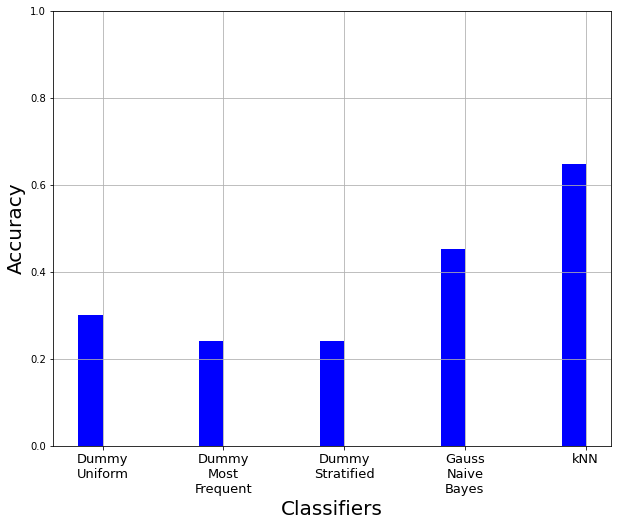

In [ ]:
#DEN EXEI TELEIWSEI AUTO AKOMA
classifiers=["Dummy\nUniform","Dummy\nMost\nFrequent","Dummy\nStratified","Gauss\nNaive\nBayes","kNN"]


fig, ax = plt.subplots(figsize = (10,8))
ax.grid(True)
xax=np.arange(len(classifiers))
ax.set_xticks(xax)
ax.set_xticklabels(classifiers, size=13)
ax.set_xlabel('Classifiers', size=20)
ax.set_ylim(0,1)
ax.set_ylabel("Accuracy", size=20)

ax.bar(xax-0.2, f1_micros_def, label='F1 MICRO DEFAULT',align='edge',width=0.2, color='blue' )
ax.bar(xax,f1_micros_opt, label='F1 MICRO OPTIMIZED',align='edge',width=0.2, color='red' )
ax.bar(xax + 0.2, f1_macros_def, label='F1 MACRO DEFAULT',align='edge',width=0.2, color='green' )
ax.bar(xax +0.4, f1_macros_opt, label='F1 MACRO OPTIMIZED',align='edge',width=0.2, color='m' )
plt.legend()


#**Μεγάλο Dataset (B09 - [SECOM Data Set](http://archive.ics.uci.edu/ml/datasets/SECOM))**

###Βασικές Πληροφορίες

1. Το dataset αφορά δεδομένα που συλλέχθηκαν κατά την παραγωγή ημιαγωγών. Yπάρχουν 1567 δείγματα με 590 χαρακτηριστικά το καθένα. Κάθε δείγμα αντιπροσωπεύει μία μονάδα που παράχθηκε και κάθε χαρακτηριστικό αντιπροσωπεύει μία μέτρηση που έγινε κατά την παραγωγή του. Όσον αφορά τα labels, οι τιμές που παίρνουν είναι 1 και -1. Η τιμή -1 υποδεικνύει πως το προϊόν πέρασε τον έλεγχο, ενώ η τιμή 1 πως απέτυχε

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Neural Networks/Ασκησεις/1η Εργασία/'
big_data_path = path+'big_data.data'
big_data_labels = path+'big_labels.data'

#Aνάγνωση των χαρακτηριστικών
df_data = pd.read_csv(big_data_path, sep=' ', header=None)

#Ανάγνωση των labels και εισαγωγή τους στο dataset των χαρακτηριστικών στο τελευταίο column
df_vals = pd.read_csv(big_data_labels,sep=' ', header=None)
df_vals = df_vals[0]
df_data['Label'] = df_vals
df_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,...,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,...,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,...,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,...,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,...,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,-0.0057,0.9579,203.9867,0.0,11.7692,419.3404,10.2397,0.9693,193.7470,12.5373,1.4072,-5418.75,2608.00,-6228.25,356.00,1.2817,1.9540,7.0793,71.1444,2.2222,0.1753,3.4680,83.8405,8.7164,50.2482,64.3573,49.7518,66.2013,86.3672,120.5156,...,0.80,0.4754,8.5138,0.3141,85.1806,4.2063,1.0367,1.0972,0.3553,0.0929,32.3812,264.272,0.5671,4.98,0.0877,2.0902,0.0382,1.8844,15.4662,536.3418,2.0153,7.98,0.2363,2.6401,0.0785,1.4879,11.7256,0.0068,0.0138,0.

In [ ]:
n_samples=df_data.shape[0]

2. Έχουμε 1567 δείγματα, το καθένα με 590 χαρακτηριστικά. Τα χαρακτηριστικά αυτά αντιπροσωπεύουν διάφορες μετρήσεις (πχ από αισθητήρες), επομένως πρόκειται για αριθμητικά χαρακτηριστικά.

3. Δεν υπήρχε κάποια αρίθμηση στα αρχεία κειμένου των δεδομένων, ούτε υπήρχαν κεφαλίδες.

4. Οι ετικέτες των κλάσεων είναι οι τιμές 1 και -1 οι οποίες αντιπροσωπεύουν αντίστοιχα αποτυχία και επιτυχία (δεν καταλαβαίνω γιατί να αντιστοιχίσεις το -1 σε επιτυχία, αλλά ποιος είμαι εγώ να κρίνω...)

5. Δε χρειάστηκε να κάνουμε κάποια μετατροπή στα αρχεία κειμένου, τα χρησιμοποιήσαμε όπως τα πήραμε και στη συνέχεια παράξαμε ένα ενιαίο dataset από αυτά.

6. Υπάρχουν αρκετά δείγματα με απουσιάζουσες τιμές. Συγκεκριμένα όπως βλέπουμε παρακάτω, είναι 538, δηλαδή περίπου το 34% των δειγμάτων.

In [ ]:
def check_missing_value(attributes):
  for a in attributes:
    if np.isnan(a):
      return True
  return False

missing_values_samples=0
for sample in df_data:
   if check_missing_value(df_data[sample]):
     missing_values_samples+=1

print("Samples with missing values: "+str(missing_values_samples),",", float("{:.3f}".format(100*missing_values_samples/n_samples)),"% of the total dataset")

Samples with missing values: 538 , 34.333 % of the total dataset


7. Όπως βλέπουμε, τα δείγματά μας αντιστοιχούν σε 1463 επιτυχίες και 104 αποτυχίες. Προφανώς το dataset μας δεν είναι ισορροπημένο, καθώς η μία κλάση είναι σχεδόν 14 φορές υπερπληθέστερη από την άλλη.

In [ ]:
labels_df = df_data.iloc[:,[-1]] #Τα labels βρισκονται στην τελευταία στήλη
features_df = df_data.iloc[:,:591] #590 attributes, στις στήλες 0-590.

np_features=features_df.values #Μετατρέπουμε το dataframe σε np array
np_labels = labels_df.values.flatten()

instances_per_class = Counter(np_labels)
print(instances_per_class)

Counter({-1: 1463, 1: 104})
